In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline

In [4]:
#set parameters
Lx=0.01
Ly=0.01
nx=21
ny=21
dx=Lx/(nx-1)
dy=Ly/(ny-1)
alpha=1e-4

x=numpy.linspace(0.0,Lx,num=nx)
y=numpy.linspace(0.0,Ly,num=ny)

#initial conditions
#T[y,x] is the setup that we will choose
T0=20.0 * numpy.ones((ny,nx)) #center is initially 20 deg - here have ny row and nx columns
T0[0,:]=100.0 #here all the x points at the bottom are = 100
T0[:,0]=100.0 #here all the y points at the left hand side are = 100

In [37]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    T=T0.copy()
    sigma_x=(alpha*dt)/dx**2
    sigma_y=(alpha*dt)/dy**2
    I=int(nx/2)
    J=int(ny/2)
    for n in range(nt):
        for j in range(1,ny-1):
            for i in range (1,nx-1):
                T[j,i]= T[j,i] + sigma_x * (T[j,i-1] - 2*T[j,i] + T[j,i+1]) + \
                sigma_y*(T[j-1,i] - 2*T[j,i] + T[j+1,i])
                #the "\" just lets you continue on the next line
        T[0,:]=100.0 #Bottom
        T[:,0]=100.0 #Left
        T[-1,:]=T[-2,:] #Top - use to get the interior points
        T[:,-1]=T[:,-2] #Right - use to get the interior points
        if T[J,I] >= 70.0:
            break
    print('Time steps {}; Temperatureat the center is {}C'.format(n, T[J,I]))
    return T
        
        #T[1:-1, 1:-1]=T[1:-1,1:-1] + sigma_x*(T[1:-1, :-2])

In [38]:
sigma = 0.25
dt = sigma/(alpha*(1/dx**2 + 1/dy**2))
nt= 500 #number of time steps

T=ftcs(T0,nt,dt,dx,dy,alpha)

Time steps 383; Temperatureat the center is 70.0153291058547C


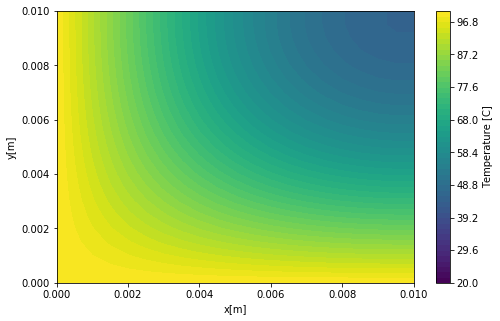

In [39]:
pyplot.figure(figsize=(8.0,5.0))
pyplot.xlabel('x[m]')
pyplot.ylabel('y[m]')
contf = pyplot.contourf(x,y,T, levels=numpy.linspace(20.0, 100.0, num=51))
cbar = pyplot.colorbar(contf)
cbar.set_label('Temperature [C]')
